<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/Actividad_3_5_%E2%80%93_Clasificaci%C3%B3n_de_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

23_24 Carlos J. Delgado Bolaños

# 0. Carga de Datos

Cargaremos los datos de la misma forma que lo hemos hecho otras veces en Google Collaboratory.


In [1]:
import numpy as np
import pandas as pd
# Cargamos el dataset desde archivo csv en Github
github_path = 'https://raw.githubusercontent.com/skyteck8/BigDataMachineLearning/main/winequality-red.csv'
data = pd.read_csv(github_path, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Mostrar la matriz de correlación de variables

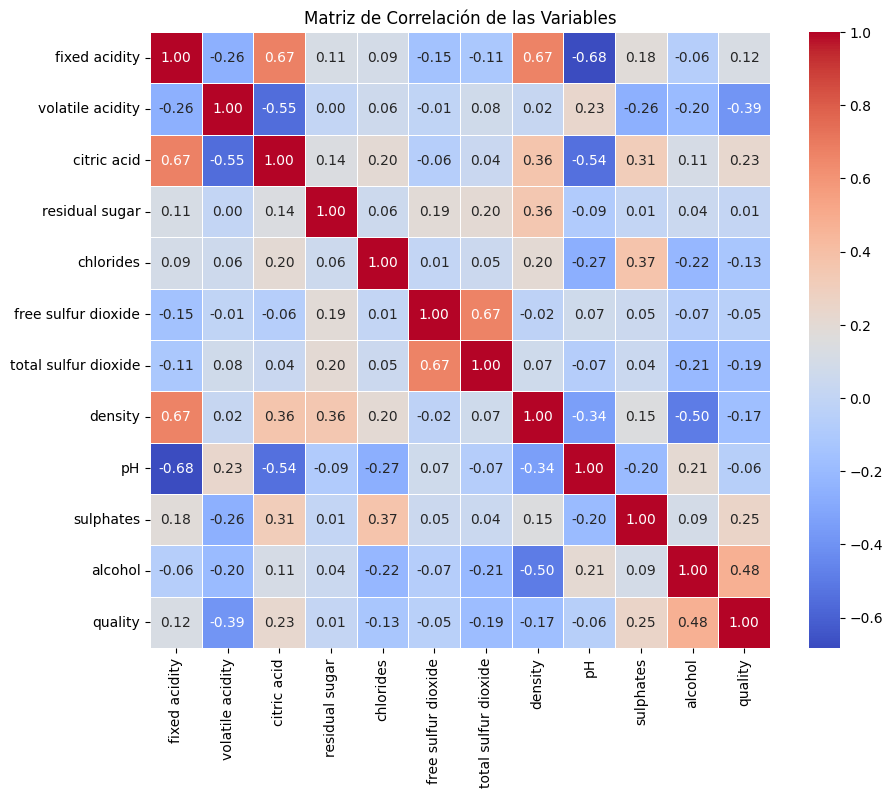

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un heatmap para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Mostrar el título
plt.title('Matriz de Correlación de las Variables')

# Mostrar la gráfica
plt.show()

 Técnica de selección de características

In [3]:

from sklearn.feature_selection import SelectKBest, f_classif

# Preparación de los datos
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo


# Seleccionando las 8 mejores características
kbest = SelectKBest(score_func=f_classif, k=8)
X_new = kbest.fit_transform(X, y)

# Obteniendo los nombres de las características seleccionadas
selected_features = X.columns[kbest.get_support(indices=True)]

print("Las 8 mejores características seleccionadas son:", selected_features.tolist())




Las 8 mejores características seleccionadas son: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [4]:
# Inicializando y ajustando SelectKBest
kbest = SelectKBest(score_func=f_classif, k='all')  # Puedes cambiar el valor de k si deseas seleccionar un número diferente de características
kbest.fit(X, y)

# Obteniendo las puntuaciones de todas las características
feature_scores = kbest.scores_

# Creando un DataFrame para visualizar las características y sus puntuaciones
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Ordenando el DataFrame por puntuación en orden descendente
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print("Características y sus puntuaciones de importancia:")
print(feature_scores_df)

Características y sus puntuaciones de importancia:
                 Feature       Score
10               alcohol  115.854797
1       volatile acidity   60.913993
6   total sulfur dioxide   25.478510
9              sulphates   22.273376
2            citric acid   19.690664
7                density   13.396357
0          fixed acidity    6.283081
4              chlorides    6.035639
5    free sulfur dioxide    4.754233
8                     pH    4.341764
3         residual sugar    1.053374


Revisando la tabla de correlación he visto una gran correlación negativa entre fixed acidity y residual sugar, una ve usado el kbest se refuerza que este atributo no nos sirve, por lo que eliminaremos los atributos con un score menora 10

In [5]:
X.drop(['fixed acidity', 'chlorides', 'free sulfur dioxide', 'pH', 'residual sugar'], axis=1)

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,34.0,0.99780,0.56,9.4
1,0.880,0.00,67.0,0.99680,0.68,9.8
2,0.760,0.04,54.0,0.99700,0.65,9.8
3,0.280,0.56,60.0,0.99800,0.58,9.8
4,0.700,0.00,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5
1595,0.550,0.10,51.0,0.99512,0.76,11.2
1596,0.510,0.13,40.0,0.99574,0.75,11.0
1597,0.645,0.12,44.0,0.99547,0.71,10.2


Entrenamiento distintos modelos de arboles

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier


# Configurar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar los modelos
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=42),
    "BaggingClassifier": BaggingClassifier(random_state=42)
}

# Diccionario para almacenar los resultados de la precisión
results = {}

# Calcular la precisión para cada modelo usando validación cruzada
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = np.mean(cv_results)

# Imprimir los resultados
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}% de precisión")

DecisionTreeClassifier: 0.62% de precisión
RandomForestClassifier: 0.70% de precisión
AdaBoostClassifier: 0.53% de precisión
BaggingClassifier: 0.66% de precisión


Entrenarlo y obtener la matriz de confusión

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar el modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=8)

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Accuracy: 0.66
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.09      0.15        11
           5       0.71      0.79      0.75       136
           6       0.64      0.67      0.65       128
           7       0.57      0.42      0.49        40
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.40      0.33      0.34       320
weighted avg       0.64      0.66      0.64       320



In [8]:
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0   0   1   1   0   0]
 [  1   1   6   3   0   0]
 [  0   1 107  25   3   0]
 [  0   0  32  86  10   0]
 [  0   0   5  17  17   1]
 [  0   0   0   3   0   0]]


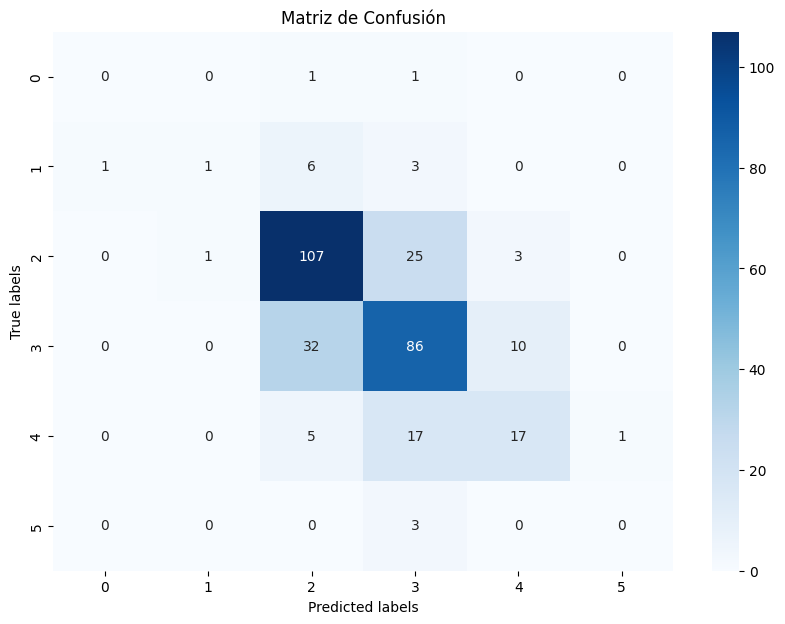

In [9]:
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

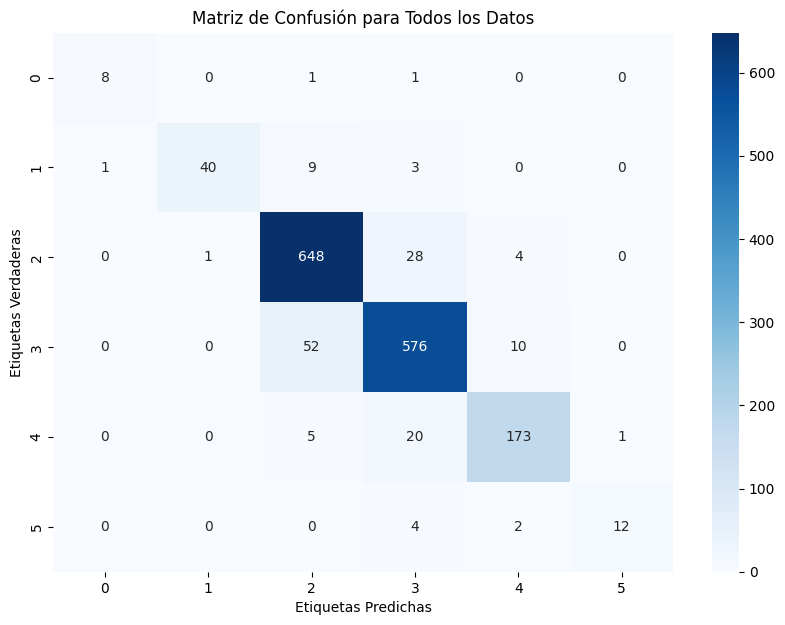

In [10]:
# Predecir las etiquetas para todos los datos usando el modelo entrenado
y_pred_all = random_forest_model.predict(X)

# Generar la matriz de confusión usando las etiquetas verdaderas y las predicciones
cm_all = confusion_matrix(y, y_pred_all)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para Todos los Datos')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [11]:
# Evaluar el modelo
accuracy = accuracy_score(y, y_pred_all)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


Exportar / importar modelo

In [15]:
import joblib

joblib.dump(random_forest_model,'ClasificacionVinosTintosRandomForest.pkl')

modelo_cargado=joblib.load('ClasificacionVinosTintosRandomForest.pkl')

y_pred = modelo_cargado.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


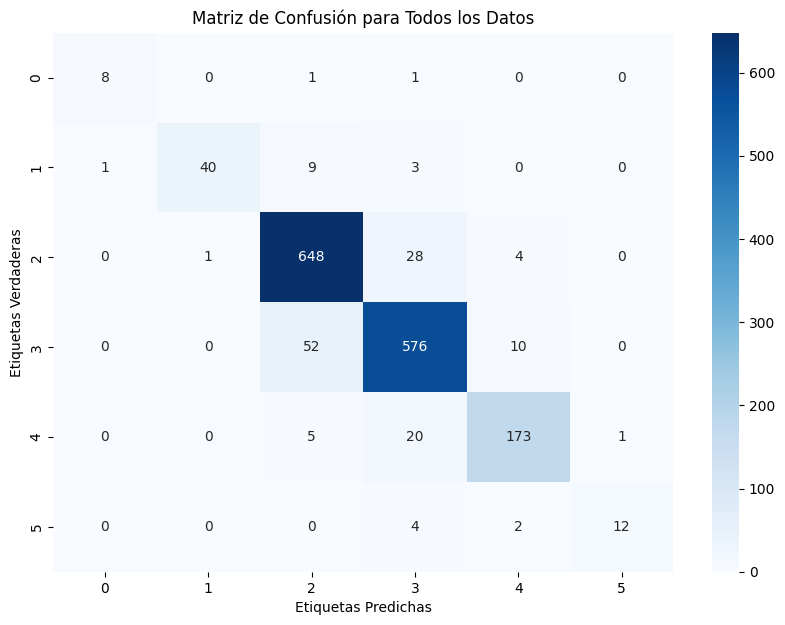

In [16]:
# Generar la matriz de confusión usando las etiquetas verdaderas y las predicciones
cm_all = confusion_matrix(y, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para Todos los Datos')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()